# EDA Example + Multilinear Regression model


## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('./data/cars.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## Preprocessing

In [3]:
raw_data.shape # Shows how many rows and columns in you dataset

(4345, 9)

### Exploratory Data Analysis (EDA)

In [4]:
# We need to "evaluate" our variables - data is often not clean (not ready for modeling)
# The Pandas .drescribe() Method is a good starting point 

In [5]:
# By default, you'll only get stats about numerical values
raw_data.describe()

Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

In [6]:
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Notice how categorical variables show different metrics than numerical variables 

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Determining the variables of interest

In [7]:
# As you can see above the Model column we has 312 unique values
# (side note: we could dummy our Model column, but that would generate 300+ columns and cause out model to be overfit)
# We have not use for this column, so we're going to drop it.
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Dealing with missing values

In [8]:
# data.isnull() return a dataframe with boolian values: True for missing values and False for Non-missing values
# In Python True == 1 and False == 0, so we can sum all our null togeter,
True == 1 , False == 0

(True, True)

In [9]:
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is acceptable
data.dropna(axis=0, inplace=True)

In [11]:
# .isna() is the same as .isnull() 
# Bellow we can varifying that we droped the null values
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [12]:
# Let's check if anything's changed after removing null values
data.describe(include='all')
# It looks like we lost about 300 rows of data. Less than 5%, so we're ok

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

Categorical variable
Categorical variable
Categorical variable
Categorical variable


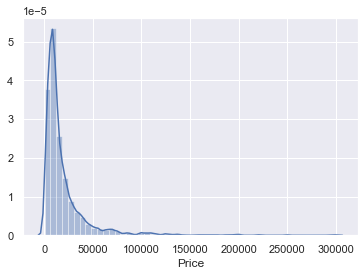

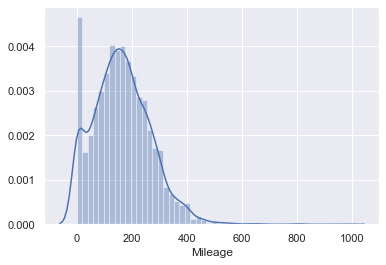

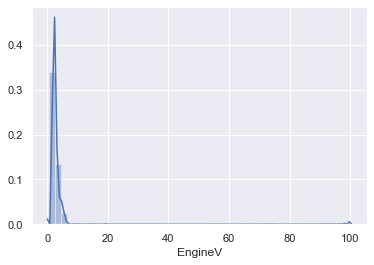

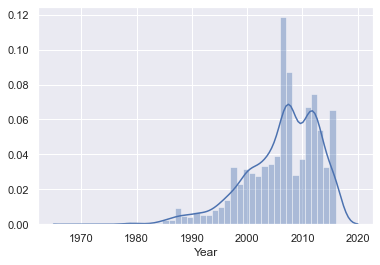

<Figure size 432x288 with 0 Axes>

In [13]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
for i in list(data.columns):
    try:
        sns.distplot(data[i]);
        plt.figure()
    except:
        print("Categorical variable")

### Dealing with outliers

In [14]:
# Obviously there are some outliers present 

# For this example we have used cars that cost as much as 300,000, which will certainly skew our predictions
# One solution is to take out the extreme data points, so that we are not predicting based on anomolies

# Let's take every data point bellow the 99 percentile
data_1 = data[data['Price']< data['Price'].quantile(0.99)]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1 = data_1[data_1['Mileage']<data_1['Mileage'].quantile(0.995)] # Milage is skewed also
data_1[data_1['EngineV']<6.5] # Lamborghinis have 6.5 liter engines,so let's get rid of anything above that extreme. 
data_1[data_1['Year']>data_1['Year'].quantile(0.01)] # let's get rid of any super old cars, since it's extreme
df = data_1.reset_index(drop=True) # Need to reset the index when you drop columns
df.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3964    3964.000000   3964  3964.000000  3964.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           872            NaN   1522          NaN          NaN   
mean           NaN   17867.728547    NaN   162.959637     2.745832   
std            NaN   18983.431313    NaN    98.003905     4.968224   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    92.750000     1.800000   
50%            NaN   11499.500000    NaN   159.000000     2.200000   
75%            NaN   21200.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   472.000000    99.990000   

       Engine Type Registration         Year  
count         3964         3964  3964.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1837         3593          NaN  
mean           NaN          NaN  2006.329213  
std            NaN          NaN     6.649347  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

In [15]:
# Let's see what's left
df.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3964    3964.000000   3964  3964.000000  3964.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           872            NaN   1522          NaN          NaN   
mean           NaN   17867.728547    NaN   162.959637     2.745832   
std            NaN   18983.431313    NaN    98.003905     4.968224   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    92.750000     1.800000   
50%            NaN   11499.500000    NaN   159.000000     2.200000   
75%            NaN   21200.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   472.000000    99.990000   

       Engine Type Registration         Year  
count         3964         3964  3964.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1837         3593          NaN  
mean           NaN          NaN  2006.329213  
std            NaN          NaN     6.649347  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

## Checking the OLS assumptions

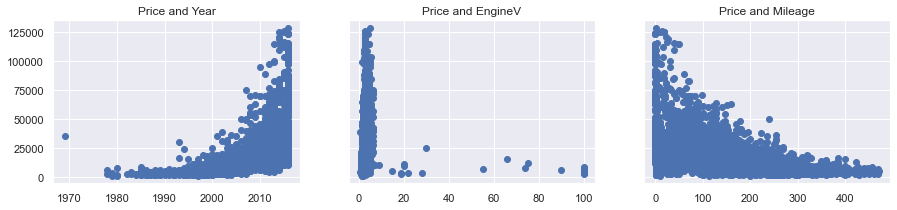

In [16]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price and Mileage')



plt.show()

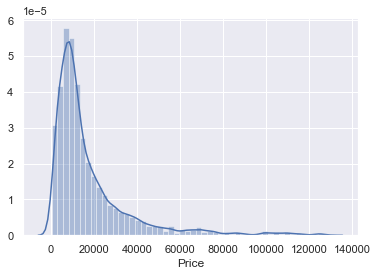

In [17]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(df['Price'])

### Relaxing the assumptions

In [18]:
# Let's transform 'Price' with a log transformation
log_price = np.log(df['Price'])

# Then we add it to our data frame
df['log_price'] = log_price
df

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3959         Toyota   17900.0      sedan       35      1.6      Petrol   
3960  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3961            BMW    6500.0      sedan        1      3.5      Petrol   
3962            BMW    8000.0      sedan      194      2.0      Petrol   
3963     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3959          yes  2014   9.792556  
3960          yes  2014  11.736069  
3961          yes  1999   8.779557  
3962          yes  1985   8.987197  
3963          yes  2013   9.510445  

[3964 rows x 9 columns]

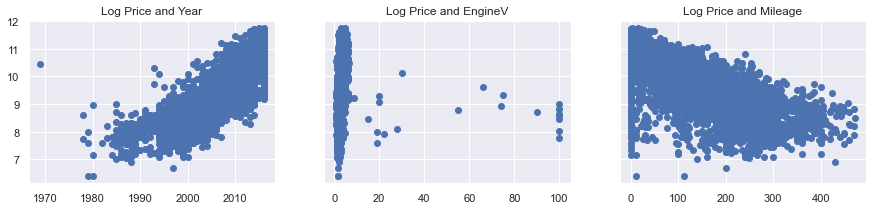

In [19]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(df['EngineV'],df['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(df['Mileage'],df['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [20]:
# Since we will be using the log price variable, we can drop the old 'Price' one
df.drop(['Price'],axis=1, inplace=True)

### Multicollinearity

In [21]:
# Let's quickly see the columns of our data frame
df.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [22]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [23]:
# Let's explore the result
vif

VIF Features
0  3.742277  Mileage
1  3.981555     Year
2  1.307007  EngineV

In [24]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = df.drop(['Year'],axis=1)

## Create dummy variables

In [25]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [26]:
# Here's the result
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Rearrange a bit

In [27]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [28]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [29]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear regression model

### Declare the inputs and the targets

In [30]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [31]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
inputs_scaled = scaler.fit_transform(inputs)

### Train Test Split

In [32]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=42)

### Create the regression

In [33]:
# Create a linear regression object
lr = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
preds = lr.predict(x_train)

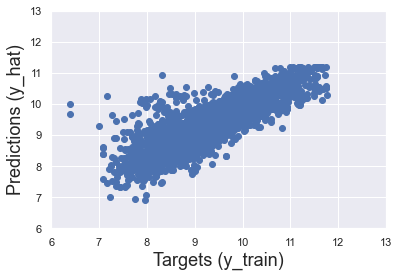

In [35]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, preds)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

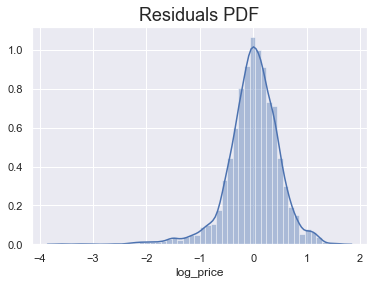

In [36]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - preds)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [37]:
# Find the R-squared of the model
lr.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.6931663910701116

### Finding the weights and bias

In [38]:
# Obtain the bias (intercept) of the regression
lr.intercept_, np.exp(lr.intercept_)

(9.392157771108339, 11993.951632851851)

In [39]:
# Obtain the weights (coefficients) of the regression
lr.coef_

# Note that they are barely interpretable if at all

array([-0.45305838,  0.00890113,  0.03570084,  0.05476406, -0.16026084,
       -0.20996919, -0.05060652, -0.11500588, -0.24955161, -0.13895887,
       -0.28742003, -0.18918191, -0.23887235, -0.10681787, -0.03312442,
       -0.12661143,  0.30447877])

In [41]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

Features   Weights
0               Mileage -0.453058
1               EngineV  0.008901
2             Brand_BMW  0.035701
3   Brand_Mercedes-Benz  0.054764
4      Brand_Mitsubishi -0.160261
5         Brand_Renault -0.209969
6          Brand_Toyota -0.050607
7      Brand_Volkswagen -0.115006
8            Body_hatch -0.249552
9            Body_other -0.138959
10           Body_sedan -0.287420
11           Body_vagon -0.189182
12             Body_van -0.238872
13      Engine Type_Gas -0.106818
14    Engine Type_Other -0.033124
15   Engine Type_Petrol -0.126611
16     Registration_yes  0.304479

In [42]:
# Check the different categories in the 'Brand' variable
df['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [43]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = lr.predict(x_test)

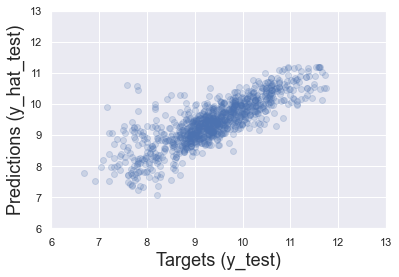

In [44]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [45]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0   9986.104828
1  17883.760210
2   7215.990291
3  14767.556093
4  10563.319756

In [46]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction   Target
0     9986.104828   4200.0
1    17883.760210      NaN
2     7215.990291      NaN
3    14767.556093      NaN
4    10563.319756      NaN
..            ...      ...
986  21353.870411      NaN
987  18901.187741      NaN
988   6978.546967      NaN
989  13753.430238      NaN
990   6649.860721  17700.0

[991 rows x 2 columns]

In [47]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     9.088173
1    10.518673
2     9.259131
3     9.539644
4     8.665613
Name: log_price, dtype: float64

In [48]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction   Target
0     9986.104828   8850.0
1    17883.760210  37000.0
2     7215.990291  10500.0
3    14767.556093  13900.0
4    10563.319756   5800.0
..            ...      ...
986  21353.870411  21500.0
987  18901.187741  13400.0
988   6978.546967   5300.0
989  13753.430238  12500.0
990   6649.860721   8800.0

[991 rows x 2 columns]

In [49]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [50]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction   Target      Residual  Difference%
0     9986.104828   8850.0  -1136.104828    12.837343
1    17883.760210  37000.0  19116.239790    51.665513
2     7215.990291  10500.0   3284.009709    31.276283
3    14767.556093  13900.0   -867.556093     6.241411
4    10563.319756   5800.0  -4763.319756    82.126203
..            ...      ...           ...          ...
986  21353.870411  21500.0    146.129589     0.679673
987  18901.187741  13400.0  -5501.187741    41.053640
988   6978.546967   5300.0  -1678.546967    31.670697
989  13753.430238  12500.0  -1253.430238    10.027442
990   6649.860721   8800.0   2150.139279    24.433401

[991 rows x 4 columns]

In [51]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction         Target      Residual  Difference%
count    991.000000     991.000000    991.000000   991.000000
mean   15876.796699   17978.124601   2101.327902    51.107376
std    12494.332936   19204.359460  11849.514949   119.034326
min     1172.186118     800.000000 -37851.948372     0.086673
25%     7753.637027    6900.000000  -2491.000823    12.915678
50%    12040.016372   11600.000000     86.180230    27.007744
75%    20396.857048   21500.000000   3598.602116    47.549822
max    72334.997049  125000.000000  90385.543358  1941.125558

In [57]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 991

# Moreover, to make the dataset readable, we'll display only the first 2 digits after the decimal point  
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction    Target  Residual  Difference%
231    12911.18  12900.00    -11.18         0.09
273    11988.35  12000.00     11.65         0.10
947     3805.97   3800.00     -5.97         0.16
650     8113.25   8100.00    -13.25         0.16
340     8515.03   8500.00    -15.03         0.18
644     6812.06   6800.00    -12.06         0.18
926    46883.06  47000.00    116.94         0.25
204    36394.71  36300.00    -94.71         0.26
429    13863.14  13900.00     36.86         0.27
561    42770.60  42900.00    129.40         0.30
530     2488.84   2500.00     11.16         0.45
229     8141.35   8100.00    -41.35         0.51
740    40239.68  40500.00    260.32         0.64
959    12617.09  12700.00     82.91         0.65
986    21353.87  21500.00    146.13         0.68
522    27687.00  27500.00   -187.00         0.68
323    39610.18  39900.00    289.82         0.73
278     7394.71   7450.00     55.29         0.74
294    39694.49  39999.00    304.51         0.76
668    10974.39  10888.00    -86.39         0.79
240    10810.42  10900.00     89.58         0.82
652    18385.89  18200.00   -185.89         1.02
689     8707.05   8800.00     92.95         1.06
435    12126.73  11999.00   -127.73         1.06
495    22442.74  22700.00    257.26         1.13
646    11637.37  11500.00   -137.37         1.19
224    21264.37  21000.00   -264.37         1.26
634    17428.58  17200.00   -228.58         1.33
532     2317.66   2350.00     32.34         1.38
78     20190.46  19900.00   -290.46         1.46
575    21510.31  21200.00   -310.31         1.46
300    18519.02  18800.00    280.98         1.49
943     8175.89   8300.00    124.11         1.50
417     9036.40   8900.00   -136.40         1.53
490    10632.43  10800.00    167.57         1.55
50      3149.14   3100.00    -49.14         1.59
964     7652.94   7777.00    124.06         1.60
635    10271.56  10450.00    178.44         1.71
800    28989.60  29500.00    510.40         1.73
838    10175.37   9999.00   -176.37         1.76
355     9465.13   9300.00   -165.13         1.78
887     7261.75   7400.00    138.25         1.87
148    10190.57   9999.00   -191.57         1.92
952    55894.51  57000.00   1105.49         1.94
648    23435.66  23900.00    464.34         1.94
705     7140.74   6999.00   -141.74         2.03
322     4013.82   4100.00     86.18         2.10
912     2544.93   2600.00     55.07         2.12
439    12229.11  12500.00    270.89         2.17
791    11752.80  11500.00   -252.80         2.20
279     4887.77   5000.00    112.23         2.24
385    36718.38  35900.00   -818.38         2.28
499    33279.04  32500.00   -779.04         2.40
937    12491.40  12800.00    308.60         2.41
97      2253.54   2200.00    -53.54         2.43
331    20966.96  21500.00    533.04         2.48
671    42049.35  41000.00  -1049.35         2.56
550    28031.48  27300.00   -731.48         2.68
688    11663.38  11999.00    335.62         2.80
57     28185.40  29000.00    814.60         2.81
228    13383.28  12999.00   -384.28         2.96
710    13098.91  13500.00    401.09         2.97
883    12773.43  12400.00   -373.43         3.01
543    13924.37  13500.00   -424.37         3.14
453    17537.80  17000.00   -537.80         3.16
579    72231.38  69999.00  -2232.38         3.19
140    14347.82  13900.00   -447.82         3.22
840    16736.15  17300.00    563.85         3.26
25      7643.66   7400.00   -243.66         3.29
670    10019.81   9700.00   -319.81         3.30
416    15915.07  15400.00   -515.07         3.34
444    17297.77  17900.00    602.23         3.36
853    21740.88  22500.00    759.12         3.37
396     6278.21   6500.00    221.79         3.41
424    16312.09  16900.00    587.91         3.48
256     5791.24   6000.00    208.76         3.48
203     6268.09   6500.00    231.91         3.57
784    10500.58  10900.00    399.42         3.66
748    10591.54  10200.00   -391.54         3.84
387     2448.23   2550.00    101.77         3.99
213     9773.63  10200.00    426.37 

In [61]:
# Let's import the pickle library 
import pickle

# Bellow we're going to create and write into a file.
with open('pickled_model.pkl', 'wb') as pickle_file:
    pickle.dump(lr, pickle_file) # Pickle.dump() to dump the obj into the file

In [62]:
# Time to test if our pickl worked
# Bellow we're assigning the LinearRegression to the variable model
with open('pickled_model.pkl', 'rb') as pickle_file:
    model = pickle.load(pickle_file)

In [63]:
# As you can see we can still use the regression object as normal, including making predictions
model.predict(x_train)

array([10.8804052 ,  9.35529448,  9.37477234, ...,  9.37800351,
       10.32745981,  9.45215828])

In [64]:

model.coef_

array([-0.45305838,  0.00890113,  0.03570084,  0.05476406, -0.16026084,
       -0.20996919, -0.05060652, -0.11500588, -0.24955161, -0.13895887,
       -0.28742003, -0.18918191, -0.23887235, -0.10681787, -0.03312442,
       -0.12661143,  0.30447877])